In [1]:
pip install plotly==5.6.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime

In [3]:
listOfCoins = ["Bitcoin","Cardano","Ethereum","Monero","Solana","XRP"]
TotalCoins = 0
dictCoin = dict()
counter=0

for coins in listOfCoins:
    print(coins)
    counter = counter + 1

with open("./Bitcoin.json") as file:
    BitcoinData = json.load(file)
with open("./Cardano.json") as file:
    CardanoData = json.load(file)
with open("./Ethereum.json") as file:
    EthereumData = json.load(file)
with open("./Monero.json") as file:
    MoneroData = json.load(file)
with open("./Solana.json") as file:
    SolanaData = json.load(file)
with open("./XRP.json") as file:
    XRPData = json.load(file)
    
Bitcoin = "BitcoinCSV.csv"
Cardano = "CardanoCSV.csv"
Ethereum = "EthereumCSV.csv"
Monero ="MoneroCSV.csv"
Solana = "SolanaCSV.csv"
XRP = "XRPCSV.csv"

CoinlistData = [BitcoinData,CardanoData,EthereumData,MoneroData,SolanaData,XRPData]
CoinlistCSV = [Bitcoin,Cardano,Ethereum,Monero,Solana,XRP]

counter = 0
for coinName in CoinlistCSV:
    with open(coinName, "w") as file:
        csv_file = csv.writer(file)
        csv_file.writerow(["timeOpen","open",])
        for item in CoinlistData[counter]["quotes"]:
            csv_file.writerow([item['timeOpen'],item['quote']['open']])
        counter=counter+1
print("finished")



Bitcoin
Cardano
Ethereum
Monero
Solana
XRP
finished


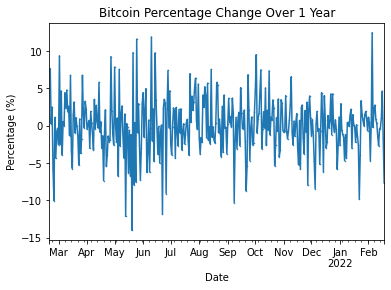

In [4]:
BitcoinPD=pd.read_csv(Bitcoin, parse_dates=['timeOpen'], index_col=['timeOpen'])
#BitcoinPD['timeOpen'] =pd.to_datetime(BitcoinPD['timeOpen']).dt.date
BitcoinPD["PercentChange"]=BitcoinPD["open"]
BitcoinPD.PercentChange=BitcoinPD.PercentChange.pct_change()*100
#BitcoinPD['PercentChange'].plot()
#BitcoinPD['PercentChange'].plot( kind='line',title='Bitcoin Percentage Change Over 1 Year')

BitcoinPD=pd.read_csv(Bitcoin, parse_dates=['timeOpen'], index_col=['timeOpen'])
BitcoinPD["PercentChange"]=BitcoinPD["open"]
BitcoinPD.PercentChange=BitcoinPD.PercentChange.pct_change()*100
ax=BitcoinPD['PercentChange'].plot( kind='line',marker='.',markersize=1,title='Bitcoin Percentage Change Over 1 Year')
ax.set(xlabel='Date', ylabel='Percentage (%)')


CardanoPD=pd.read_csv(Cardano, parse_dates=['timeOpen'], index_col=['timeOpen'])
CardanoPD["PercentChange"]=CardanoPD["open"]
CardanoPD.PercentChange=CardanoPD.PercentChange.pct_change()*100
#ax=CardanoPD['PercentChange'].plot( kind='line',marker='.',markersize=1,title='Bitcoin Percentage Change Over 1 Year')
#ax.set(xlabel='Date', ylabel='Percentage (%)')

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Percentage (%)')]

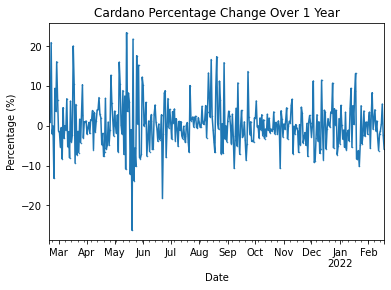

In [5]:
#Cardano
CardanoPD=pd.read_csv(Cardano, parse_dates=['timeOpen'], index_col=['timeOpen'])
CardanoPD["PercentChange"]=CardanoPD["open"]
CardanoPD.PercentChange=CardanoPD.PercentChange.pct_change()*100
ax=CardanoPD['PercentChange'].plot( kind='line',marker='.',markersize=1,title='Cardano Percentage Change Over 1 Year')
ax.set(xlabel='Date', ylabel='Percentage (%)')

In [6]:
#Ethereum
EthereumPD=pd.read_csv(Ethereum, parse_dates=['timeOpen'], index_col=['timeOpen'])
EthereumPD["PercentChange"]=EthereumPD["open"]
EthereumPD.PercentChange=EthereumPD.PercentChange.pct_change()*100

In [7]:
#Monero
MoneroPD=pd.read_csv(Monero, parse_dates=['timeOpen'], index_col=['timeOpen'])
MoneroPD["PercentChange"]=MoneroPD["open"]
MoneroPD.PercentChange=MoneroPD.PercentChange.pct_change()*100

In [8]:
#Solana
SolanaPD=pd.read_csv(Solana, parse_dates=['timeOpen'], index_col=['timeOpen'])
SolanaPD["PercentChange"]=SolanaPD["open"]
SolanaPD.PercentChange=SolanaPD.PercentChange.pct_change()*100

In [9]:
#XRP
XRPPD=pd.read_csv(XRP, parse_dates=['timeOpen'], index_col=['timeOpen'])
XRPPD["PercentChange"]=XRPPD["open"]
XRPPD.PercentChange=XRPPD.PercentChange.pct_change()*100

In [35]:
#Merge all 5 coins Percent Change except BTC

fiveCoinsMerge = pd.DataFrame()  
#fiveCoinsMerge.index = XRPPD.index
TableList=[CardanoPD, EthereumPD, MoneroPD, SolanaPD, XRPPD]

fiveCoinsMerge['table1'] = CardanoPD['PercentChange'].copy()
fiveCoinsMerge['table2'] = EthereumPD['PercentChange'].copy()
fiveCoinsMerge['table3'] = MoneroPD['PercentChange'].copy()
fiveCoinsMerge['table4'] = SolanaPD['PercentChange'].copy()
fiveCoinsMerge['table5'] = XRPPD['PercentChange'].copy()

fiveCoinsMerge['fiveCoinPercentChangeAvg'] = fiveCoinsMerge[['table1', 'table2','table3','table4', 'table5']].mean(axis=1)
#fiveCoinsMerge['percentChangeAvg'] = fiveCoinsMerge.mean(axis=1)

#fiveCoinsMerge.head()
fiveCoinsMerge['BitcoinPercentChangeAvg'] = BitcoinPD['PercentChange'].copy()



In [36]:
fiveCoinsMerge.head()
#BitcoinPD.head()



,table1,table2,table3,table4,table5,fiveCoinPercentChangeAvg,BitcoinPercentChangeAvg
timeOpen,,,,,,,
2021-02-19 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20 00:00:00+00:00,0.957122,0.599811,7.623269,27.204842,5.931688,8.463346,7.630087
2021-02-21 00:00:00+00:00,20.882571,-2.142451,-9.761563,-13.020407,-8.856955,-2.579761,0.284535
2021-02-22 00:00:00+00:00,-2.001682,0.763351,-3.357911,10.740167,5.960951,2.420975,2.492721
2021-02-23 00:00:00+00:00,-0.065223,-7.887069,-9.070419,30.349876,4.220562,3.509545,-5.705394


KeyError: "None of [Float64Index([                 nan,    7.630086981272455,   0.2845353759100666,\n                  2.49272142152841,  -5.7053941697998045,  -10.024929148918426,\n                1.1267335143312573,   -4.319054150603197,  -0.8047149649363039,\n                 -0.33382121629143,\n              ...\n                0.8681254491213153,  0.33434511634653497,  -1.3064410521650638,\n               -2.6745343794718712,  -0.4143465076316133, -0.24646875788860712,\n                1.0559558408992586,    4.643878136722668,   -1.660282002790392,\n                -7.613849651154259],\n             dtype='float64', length=365)] are in the [columns]"

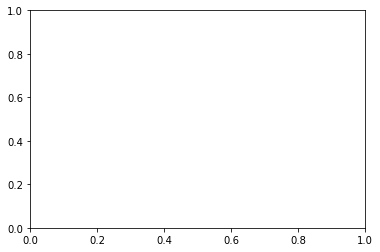

In [42]:
 fiveCoinsMerge.plot.scatter(
      x =fiveCoinsMerge['BitcoinPercentChangeAvg'],
      y= fiveCoinsMerge['fiveCoinPercentChangeAvg']  
 )
    
    